In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import scipy.io
from scipy.signal import lfilter,butter,filtfilt
import itertools
from scipy.stats import pearsonr
from scipy.signal import welch
#import seaborn as sns

In [2]:
nic=scipy.io.loadmat('CircuitROIsMTS/LMP_NIC_12_FP_mean_denoisedTS.mat')
data = nic['mts'].T
print(data.shape)

(29, 3890)


In [3]:
roinames = nic["roi_names"].flatten()
for name in roinames:
    print(name[0])

ACC
L_Acb
L_Amygdala
L_Amygdala_CM_Juelich50
L_Amygdala_LB_Juelich50_minus_intersect
L_Amygdala_SF_Juelich50
L_Caudate
L_FOrb
L_Hipp
L_Insula
L_MidFG
L_Pallidum
L_Putamen
L_SN_Hammersn30r83_74
L_Thalamus
R_Acb
R_Amygdala
R_Amygdala_CM_Juelich50
R_Amygdala_LB_Juelich50_minus_intersect
R_Amygdala_SF_Juelich50
R_Caudate
R_FOrb
R_Hipp
R_Insula
R_MidFG
R_Pallidum
R_Putamen
R_SN_Hammersn30r83_75
R_Thalamus


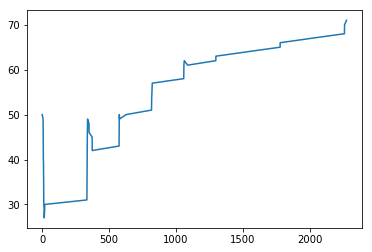

In [4]:
nict = scipy.io.loadmat('CircuitROIsMTS/LMP_NIC_12-FP/10-Apr-2017_09-57_LMP_NIC_12_FP.mat')
craving = nict['craveUpdate']
crav_t=(craving[0][0][0].T).flatten()
crav_v=(craving[0][0][1].T).flatten()
plt.plot(crav_t,crav_v)

In [5]:
# create a 10th order Butterworth filter from 0.01 to 0.1 Hz
def butter_bandpass(lowcut,highcut,fs,order=8):
    nyq = 0.5*fs
    low = lowcut/nyq
    high = highcut/nyq

    b,a = butter(order, [low, high], btype='band')
    return b,a

def butter_bandpass_filter(data,lowcut,highcut,fs,order=5):
    b,a = butter_bandpass(lowcut,highcut,fs,order=order)
    return filtfilt(b,a,data)

sampling_freq = 1/0.802
print(sampling_freq)

1.2468827930174562


[ 316  556  796 1036 1276 1516 1756 1996 2236 2476]


/Users/hstrey/anaconda/envs/python3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


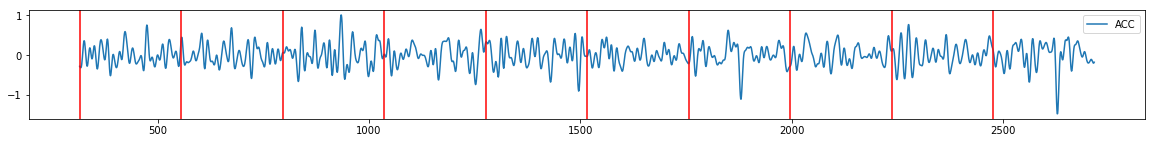

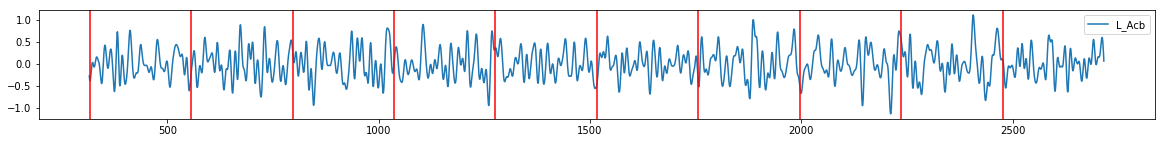

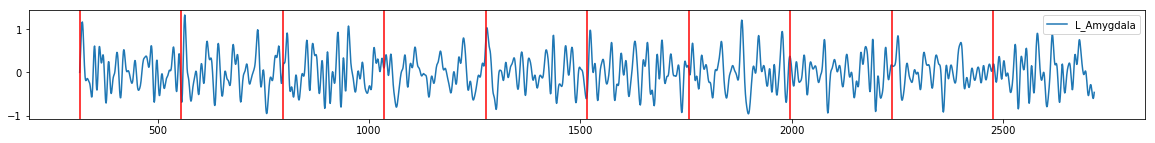

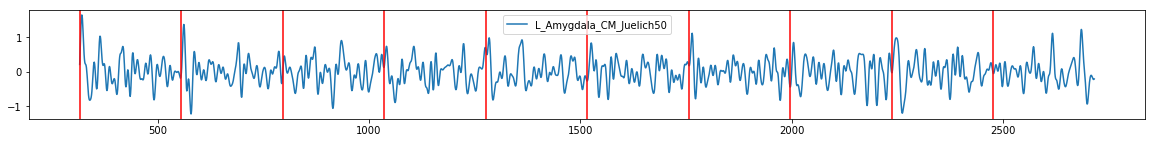

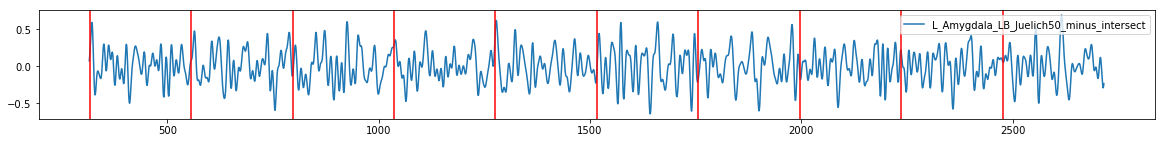

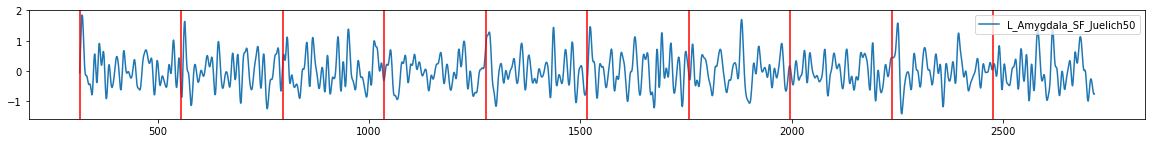

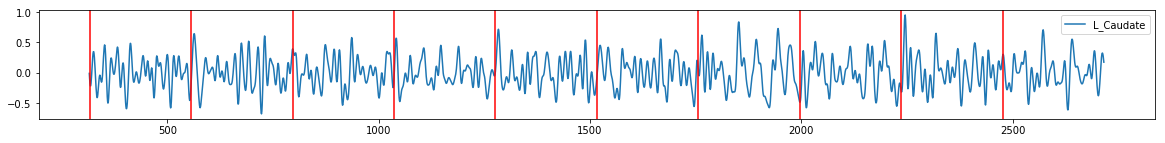

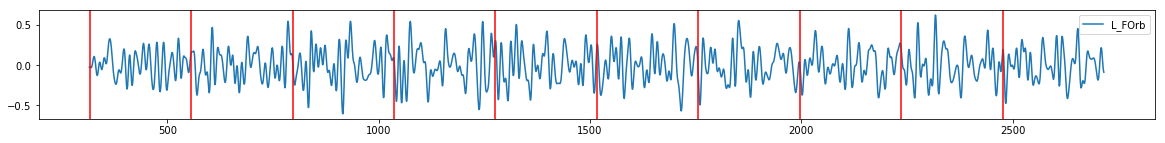

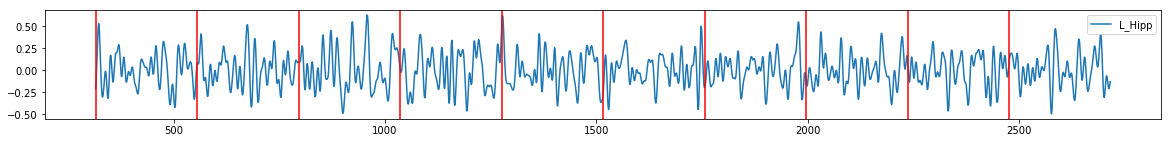

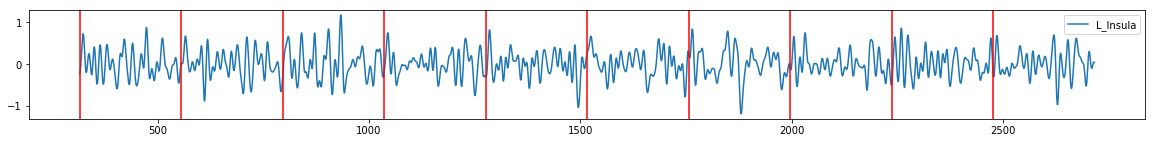

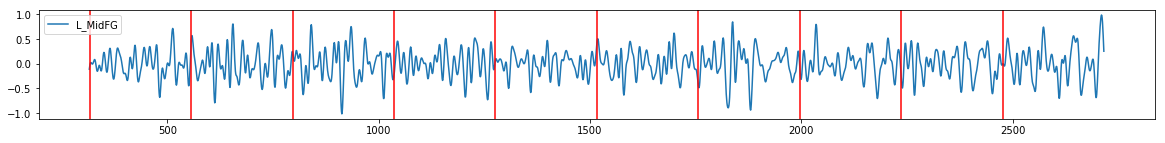

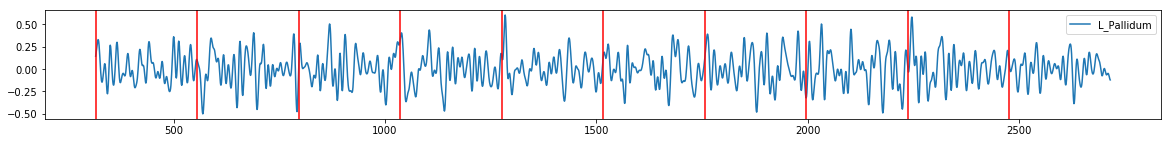

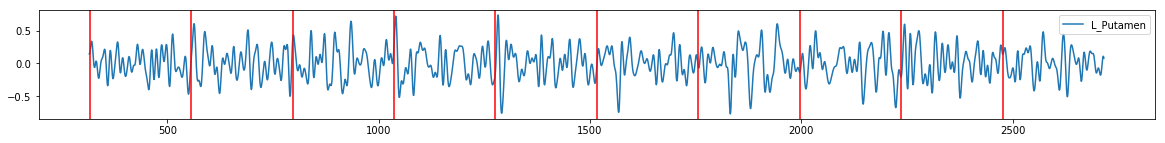

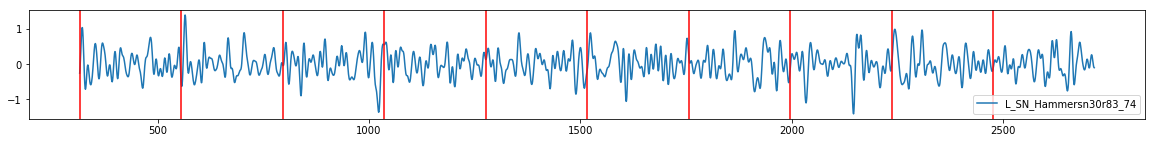

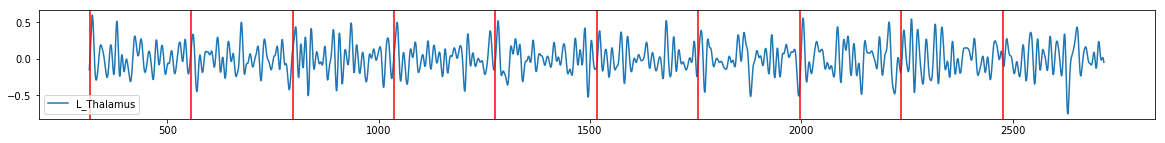

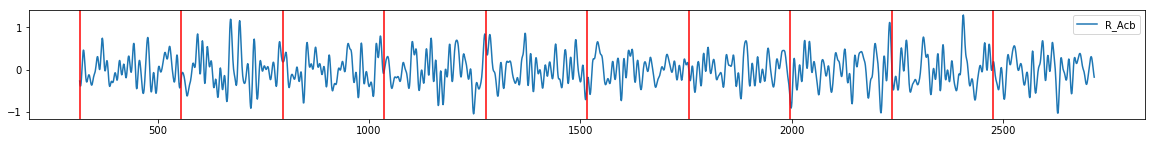

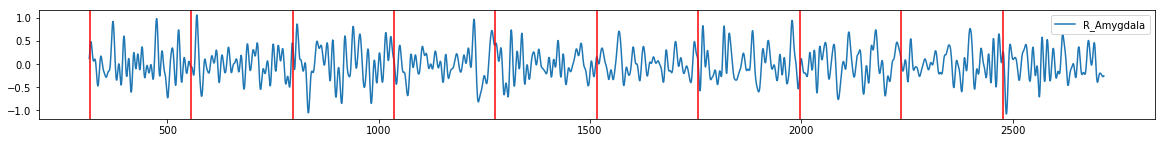

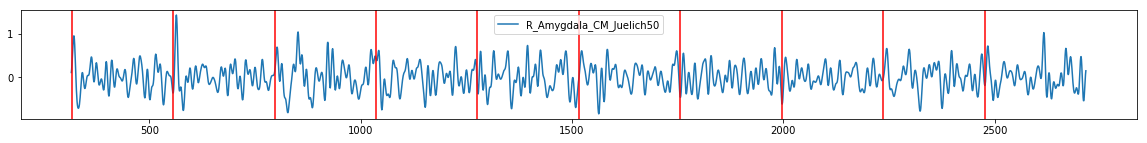

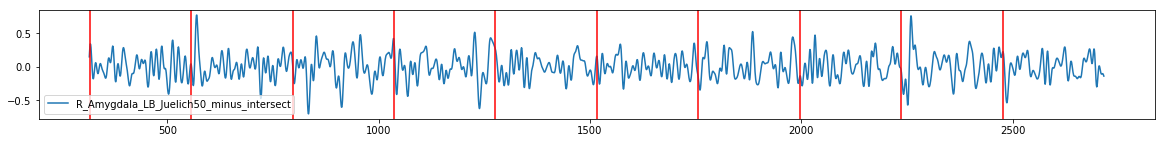

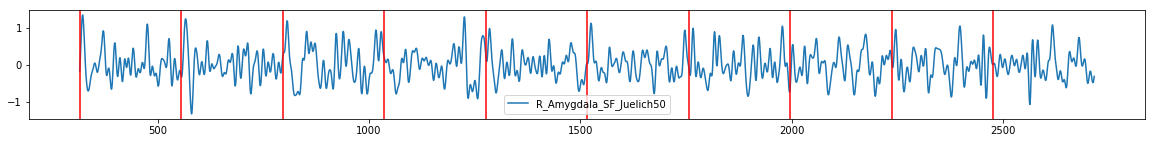

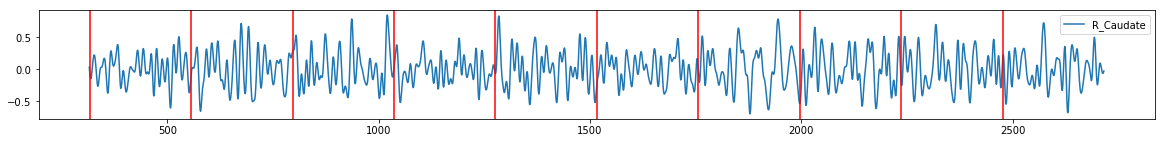

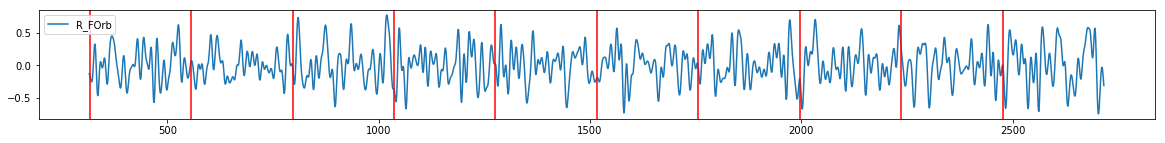

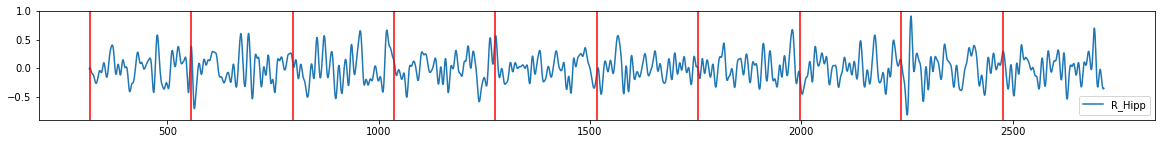

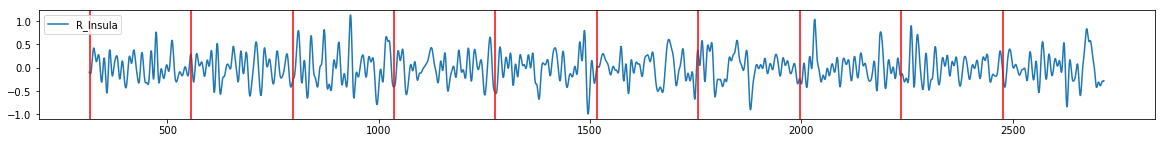

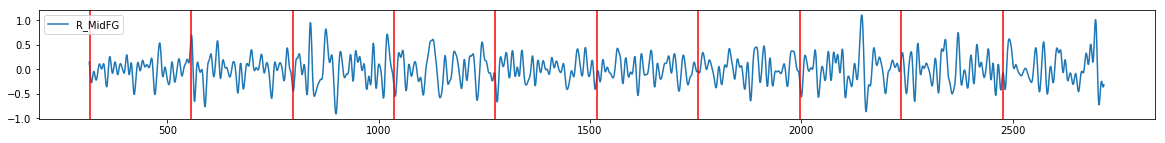

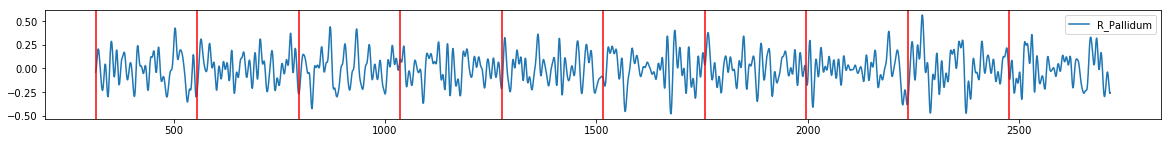

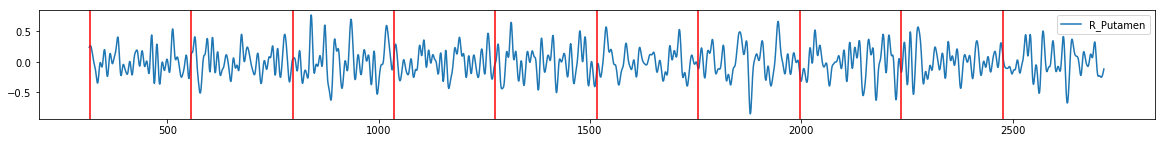

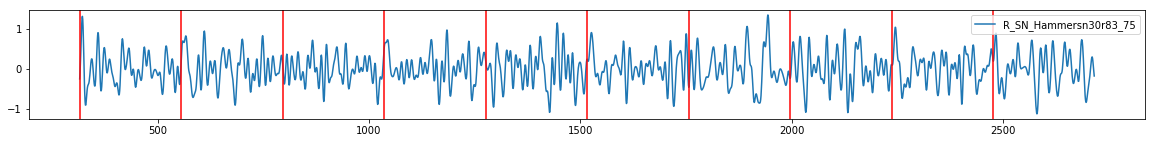

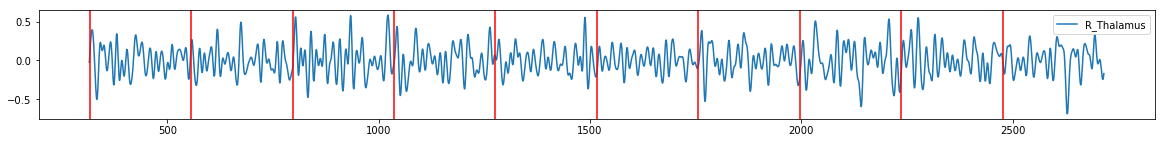

In [6]:
t = np.linspace(0,3889*.802,3890)
data_filtered = None
puffs=np.arange(316,2500,240)
print(puffs)
for trace,name in zip(data,roinames):
    trace_filtered = butter_bandpass_filter(trace,0.01,0.1,sampling_freq,order=5)
    plt.figure(figsize=(20,2))
    plt.plot(t[393:393+2994],trace_filtered[393:393+2994],label=name[0])
#    plt.xlim((0,1000))
    for p in puffs:
        plt.axvline(x=p,color="r")
    plt.legend()
    if data_filtered is None:
        data_filtered = trace_filtered
    else:
        data_filtered = np.vstack((data_filtered,trace_filtered))

In [7]:
data_filtered.shape

(29, 3890)

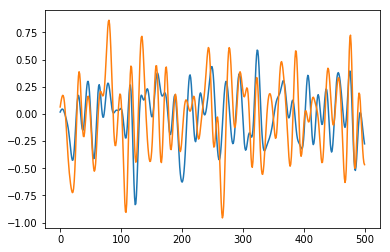

In [8]:
plt.plot(data_filtered[0][:500])
plt.plot(data_filtered[1][:500])

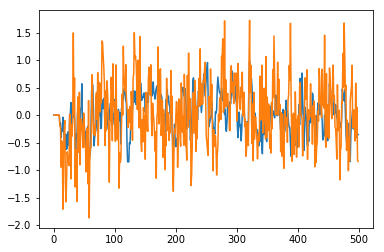

In [9]:
plt.plot(data[0][:500])
plt.plot(data[1][:500])

In [10]:
def pearson_combined(data):
    results = None
    for perm in itertools.combinations(range(data.shape[0]),2):
        pc=pearsonr(data[perm[0]],data[perm[1]])
        result=np.array([perm[0],perm[1],pc[0],pc[1]])
        if results is None:
            results = result
        else:
            results = np.vstack((results,result))
    return results
results_array = pearson_combined(data_filtered)

In [11]:
sorted_results=results_array[results_array[:,2].argsort()[::-1]]

In [12]:
for i,j,pr,pp in sorted_results:
    print(i,j,roinames[int(i)],roinames[int(j)],pr,pp)

2.0 5.0 ['L_Amygdala'] ['L_Amygdala_SF_Juelich50'] 0.897987605391 0.0
9.0 23.0 ['L_Insula'] ['R_Insula'] 0.792896776953 0.0
14.0 28.0 ['L_Thalamus'] ['R_Thalamus'] 0.780424617906 0.0
16.0 19.0 ['R_Amygdala'] ['R_Amygdala_SF_Juelich50'] 0.777353227492 0.0
12.0 26.0 ['L_Putamen'] ['R_Putamen'] 0.76902928238 0.0
6.0 20.0 ['L_Caudate'] ['R_Caudate'] 0.768740394805 0.0
16.0 18.0 ['R_Amygdala'] ['R_Amygdala_LB_Juelich50_minus_intersect'] 0.710689317757 0.0
2.0 4.0 ['L_Amygdala'] ['L_Amygdala_LB_Juelich50_minus_intersect'] 0.696609167936 0.0
8.0 22.0 ['L_Hipp'] ['R_Hipp'] 0.661524640086 0.0
0.0 28.0 ['ACC'] ['R_Thalamus'] 0.648378822515 0.0
1.0 15.0 ['L_Acb'] ['R_Acb'] 0.612347210692 0.0
0.0 14.0 ['ACC'] ['L_Thalamus'] 0.587315622215 0.0
0.0 23.0 ['ACC'] ['R_Insula'] 0.580868543524 0.0
0.0 9.0 ['ACC'] ['L_Insula'] 0.57843491251 0.0
17.0 19.0 ['R_Amygdala_CM_Juelich50'] ['R_Amygdala_SF_Juelich50'] 0.563331418617 0.0
6.0 12.0 ['L_Caudate'] ['L_Putamen'] 0.552153527595 2.17184196169e-309
4.0 5.0

5.0 11.0 ['L_Amygdala_SF_Juelich50'] ['L_Pallidum'] 0.249666106454 2.34648555907e-56
7.0 18.0 ['L_FOrb'] ['R_Amygdala_LB_Juelich50_minus_intersect'] 0.24863411193 6.84062854701e-56
20.0 25.0 ['R_Caudate'] ['R_Pallidum'] 0.248091379129 1.19841042676e-55
3.0 14.0 ['L_Amygdala_CM_Juelich50'] ['L_Thalamus'] 0.244892339695 3.17544670677e-54
21.0 26.0 ['R_FOrb'] ['R_Putamen'] 0.244770716526 3.59339298556e-54
10.0 11.0 ['L_MidFG'] ['L_Pallidum'] 0.243296078113 1.60038180377e-53
3.0 8.0 ['L_Amygdala_CM_Juelich50'] ['L_Hipp'] 0.242830065459 2.56046997784e-53
0.0 3.0 ['ACC'] ['L_Amygdala_CM_Juelich50'] 0.23996151251 4.51884213225e-52
7.0 26.0 ['L_FOrb'] ['R_Putamen'] 0.239643230819 6.19924658685e-52
22.0 26.0 ['R_Hipp'] ['R_Putamen'] 0.238408204903 2.10488722181e-51
11.0 15.0 ['L_Pallidum'] ['R_Acb'] 0.236289303413 1.68641338303e-50
15.0 17.0 ['R_Acb'] ['R_Amygdala_CM_Juelich50'] 0.236210413956 1.82153862272e-50
22.0 23.0 ['R_Hipp'] ['R_Insula'] 0.235716124433 2.95048212792e-50
7.0 19.0 ['L_FOrb

In [13]:
def sliding_window_pearson(data1,data2,window_size,step=1):
    pr = [pearsonr(data1[index:index+window_size],data2[index:index+window_size])[0]
          for index in range(0,min(data1.size,data2.size),step)]
    pr = np.array(pr)
    return pr

/Users/hstrey/anaconda/envs/python3/lib/python3.5/site-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


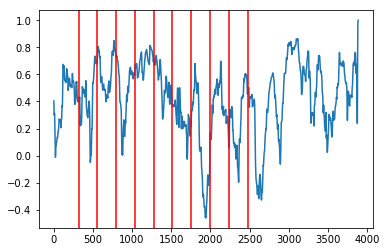

In [14]:
plt.plot(sliding_window_pearson(data_filtered[15],data_filtered[22],100))
for p in puffs:
    plt.axvline(x=p,color="r")


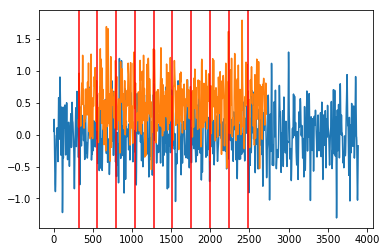

In [15]:
# new strategy:
# we compare pearson correlations of the puffs to r's from time where there is no delivery
# two time series: puffs from first puff to 2min after last puff
# nopuffs - the rest
plt.plot(range(data_filtered[15].size),data_filtered[15])
plt.plot(t[393:393+2994],data_filtered[15][393:393+2994]+0.5)
for p in puffs:
    plt.axvline(x=p,color="r")



In [16]:
data_puffs = data_filtered[:,393:393+2994]
data_nopuffs1=data_filtered[:,:393]
data_nopuffs2=data_filtered[:,393+2994:]
data_nopuffs=np.hstack((data_nopuffs1,data_nopuffs2))
print(data_puffs.shape, data_nopuffs.shape)
print(data_puffs.shape[1]+data_nopuffs.shape[1])

(29, 2994) (29, 896)
3890


In [17]:
results_puffs = pearson_combined(data_puffs)
sorted_results_puffs=results_puffs[results_puffs[:,2].argsort()[::-1]]
for i,j,pr,pp in sorted_results_puffs:
    print(i,j,roinames[int(i)],roinames[int(j)],pr,pp)

2.0 5.0 ['L_Amygdala'] ['L_Amygdala_SF_Juelich50'] 0.905370648125 0.0
14.0 28.0 ['L_Thalamus'] ['R_Thalamus'] 0.808618711212 0.0
12.0 26.0 ['L_Putamen'] ['R_Putamen'] 0.794056446319 0.0
16.0 19.0 ['R_Amygdala'] ['R_Amygdala_SF_Juelich50'] 0.783263118477 0.0
9.0 23.0 ['L_Insula'] ['R_Insula'] 0.762441925486 0.0
6.0 20.0 ['L_Caudate'] ['R_Caudate'] 0.75631819329 0.0
16.0 18.0 ['R_Amygdala'] ['R_Amygdala_LB_Juelich50_minus_intersect'] 0.730491305517 0.0
2.0 4.0 ['L_Amygdala'] ['L_Amygdala_LB_Juelich50_minus_intersect'] 0.730373754235 0.0
0.0 28.0 ['ACC'] ['R_Thalamus'] 0.646674470051 0.0
8.0 22.0 ['L_Hipp'] ['R_Hipp'] 0.636452570734 0.0
1.0 15.0 ['L_Acb'] ['R_Acb'] 0.628086029931 0.0
0.0 14.0 ['ACC'] ['L_Thalamus'] 0.608027988311 3.19558113056e-302
4.0 5.0 ['L_Amygdala_LB_Juelich50_minus_intersect'] ['L_Amygdala_SF_Juelich50'] 0.582368480838 1.85941689509e-271
0.0 23.0 ['ACC'] ['R_Insula'] 0.580405698542 3.24164967936e-269
0.0 9.0 ['ACC'] ['L_Insula'] 0.577397502467 8.25045716003e-266
18.

8.0 17.0 ['L_Hipp'] ['R_Amygdala_CM_Juelich50'] 0.272046578858 5.90154190997e-52
2.0 18.0 ['L_Amygdala'] ['R_Amygdala_LB_Juelich50_minus_intersect'] 0.271738605839 7.74364699108e-52
7.0 18.0 ['L_FOrb'] ['R_Amygdala_LB_Juelich50_minus_intersect'] 0.271591485165 8.81558420085e-52
20.0 22.0 ['R_Caudate'] ['R_Hipp'] 0.271464026536 9.86286969986e-52
15.0 26.0 ['R_Acb'] ['R_Putamen'] 0.269292017257 6.61824770367e-51
7.0 16.0 ['L_FOrb'] ['R_Amygdala'] 0.267924786915 2.17394909028e-50
5.0 17.0 ['L_Amygdala_SF_Juelich50'] ['R_Amygdala_CM_Juelich50'] 0.265826917456 1.33021560887e-49
7.0 28.0 ['L_FOrb'] ['R_Thalamus'] 0.265174219167 2.32934224478e-49
3.0 6.0 ['L_Amygdala_CM_Juelich50'] ['L_Caudate'] 0.26504166691 2.60953034687e-49
5.0 11.0 ['L_Amygdala_SF_Juelich50'] ['L_Pallidum'] 0.264067526108 6.00099541807e-49
15.0 21.0 ['R_Acb'] ['R_FOrb'] 0.263457670256 1.00894207065e-48
7.0 26.0 ['L_FOrb'] ['R_Putamen'] 0.263242184056 1.21186049121e-48
11.0 15.0 ['L_Pallidum'] ['R_Acb'] 0.259893816272 2.04

10.0 25.0 ['L_MidFG'] ['R_Pallidum'] 0.134426414478 1.51374025065e-13
14.0 19.0 ['L_Thalamus'] ['R_Amygdala_SF_Juelich50'] 0.134252961055 1.6271511912e-13
1.0 25.0 ['L_Acb'] ['R_Pallidum'] 0.1342329454 1.64076351678e-13
15.0 23.0 ['R_Acb'] ['R_Insula'] 0.13247779337 3.39008023728e-13
18.0 26.0 ['R_Amygdala_LB_Juelich50_minus_intersect'] ['R_Putamen'] 0.131606097662 4.84387295907e-13
6.0 22.0 ['L_Caudate'] ['R_Hipp'] 0.13144772617 5.16702414093e-13
11.0 22.0 ['L_Pallidum'] ['R_Hipp'] 0.131366904855 5.33999699453e-13
3.0 27.0 ['L_Amygdala_CM_Juelich50'] ['R_SN_Hammersn30r83_75'] 0.129683349824 1.05543423182e-12
1.0 16.0 ['L_Acb'] ['R_Amygdala'] 0.128673526823 1.58155049889e-12
19.0 28.0 ['R_Amygdala_SF_Juelich50'] ['R_Thalamus'] 0.127562541521 2.45895269812e-12
1.0 10.0 ['L_Acb'] ['L_MidFG'] 0.125114610606 6.4154851295e-12
11.0 21.0 ['L_Pallidum'] ['R_FOrb'] 0.124944121828 6.85388660013e-12
12.0 22.0 ['L_Putamen'] ['R_Hipp'] 0.124769725086 7.33267015499e-12
21.0 25.0 ['R_FOrb'] ['R_Palli

In [18]:
results_nopuffs = pearson_combined(data_nopuffs)
sorted_results_nopuffs=results_nopuffs[results_nopuffs[:,2].argsort()[::-1]]
for i,j,pr,pp in sorted_results_nopuffs:
    print(i,j,roinames[int(i)],roinames[int(j)],pr,pp)

9.0 23.0 ['L_Insula'] ['R_Insula'] 0.878754210977 1.99992483672e-289
2.0 5.0 ['L_Amygdala'] ['L_Amygdala_SF_Juelich50'] 0.866103687158 1.82928116953e-271
6.0 20.0 ['L_Caudate'] ['R_Caudate'] 0.816948541122 6.45782671253e-216
16.0 19.0 ['R_Amygdala'] ['R_Amygdala_SF_Juelich50'] 0.759194663772 6.39004180874e-169
8.0 22.0 ['L_Hipp'] ['R_Hipp'] 0.750705193789 3.95676201675e-163
12.0 26.0 ['L_Putamen'] ['R_Putamen'] 0.702529041905 3.22083003014e-134
14.0 28.0 ['L_Thalamus'] ['R_Thalamus'] 0.690020621825 1.20294200509e-127
11.0 12.0 ['L_Pallidum'] ['L_Putamen'] 0.661534186964 7.34083390519e-114
0.0 28.0 ['ACC'] ['R_Thalamus'] 0.656327741535 1.67246640224e-111
16.0 18.0 ['R_Amygdala'] ['R_Amygdala_LB_Juelich50_minus_intersect'] 0.645440756333 1.01083963707e-106
9.0 12.0 ['L_Insula'] ['L_Putamen'] 0.600830487635 5.08458601258e-89
23.0 26.0 ['R_Insula'] ['R_Putamen'] 0.59672481766 1.57476654595e-87
0.0 9.0 ['ACC'] ['L_Insula'] 0.588313747117 1.53221222264e-84
0.0 23.0 ['ACC'] ['R_Insula'] 0.588

15.0 19.0 ['R_Acb'] ['R_Amygdala_SF_Juelich50'] 0.320617368866 7.2194835494e-23
20.0 28.0 ['R_Caudate'] ['R_Thalamus'] 0.318787963043 1.29978478593e-22
7.0 24.0 ['L_FOrb'] ['R_MidFG'] 0.317797291289 1.78411740927e-22
5.0 8.0 ['L_Amygdala_SF_Juelich50'] ['L_Hipp'] 0.316811666342 2.44210019258e-22
20.0 25.0 ['R_Caudate'] ['R_Pallidum'] 0.314257821474 5.47858174761e-22
6.0 23.0 ['L_Caudate'] ['R_Insula'] 0.314000824528 5.94007134714e-22
7.0 22.0 ['L_FOrb'] ['R_Hipp'] 0.31318564943 7.67314328894e-22
7.0 16.0 ['L_FOrb'] ['R_Amygdala'] 0.311971388315 1.1218783339e-21
11.0 25.0 ['L_Pallidum'] ['R_Pallidum'] 0.311411445538 1.33586687079e-21
24.0 28.0 ['R_MidFG'] ['R_Thalamus'] 0.310935111483 1.54928716534e-21
19.0 21.0 ['R_Amygdala_SF_Juelich50'] ['R_FOrb'] 0.310917331114 1.55787416106e-21
3.0 14.0 ['L_Amygdala_CM_Juelich50'] ['L_Thalamus'] 0.310479453233 1.78482960758e-21
3.0 5.0 ['L_Amygdala_CM_Juelich50'] ['L_Amygdala_SF_Juelich50'] 0.309168899136 2.67782619847e-21
19.0 23.0 ['R_Amygdala_SF

16.0 21.0 ['R_Amygdala'] ['R_FOrb'] 0.142169504754 1.94275819511e-05
4.0 16.0 ['L_Amygdala_LB_Juelich50_minus_intersect'] ['R_Amygdala'] 0.140662576621 2.38265261726e-05
17.0 27.0 ['R_Amygdala_CM_Juelich50'] ['R_SN_Hammersn30r83_75'] 0.133652660066 5.99284677884e-05
2.0 14.0 ['L_Amygdala'] ['L_Thalamus'] 0.133177608979 6.3691446294e-05
13.0 15.0 ['L_SN_Hammersn30r83_74'] ['R_Acb'] 0.133111661275 6.42311493863e-05
9.0 21.0 ['L_Insula'] ['R_FOrb'] 0.130710299377 8.71017161763e-05
6.0 13.0 ['L_Caudate'] ['L_SN_Hammersn30r83_74'] 0.13021729206 9.266291256e-05
3.0 25.0 ['L_Amygdala_CM_Juelich50'] ['R_Pallidum'] 0.129347125289 0.000103304010728
4.0 28.0 ['L_Amygdala_LB_Juelich50_minus_intersect'] ['R_Thalamus'] 0.127887050501 0.000123786170128
11.0 21.0 ['L_Pallidum'] ['R_FOrb'] 0.126771003432 0.000141957776877
3.0 18.0 ['L_Amygdala_CM_Juelich50'] ['R_Amygdala_LB_Juelich50_minus_intersect'] 0.126341602536 0.000149595386791
24.0 26.0 ['R_MidFG'] ['R_Putamen'] 0.126056108795 0.000154885342078


In [19]:
print(results_puffs.shape)

(406, 4)


In [20]:
results_diffp = results_puffs[:,2]-results_nopuffs[:,2]
results_diff = np.vstack((results_puffs.T,results_diffp)).T
print(results_diff.shape)

(406, 5)


In [21]:
sorted_results_diff=results_diff[results_diff[:,4].argsort()[::-1]]
for i,j,pr,pp,pd in sorted_results_diff:
    print(i,j,roinames[int(i)],roinames[int(j)],pr,pp,pd)

25.0 28.0 ['R_Pallidum'] ['R_Thalamus'] 0.155318552383 1.26326186593e-17 0.277951376209
4.0 17.0 ['L_Amygdala_LB_Juelich50_minus_intersect'] ['R_Amygdala_CM_Juelich50'] 0.228417425994 9.73313547838e-37 0.272223770747
4.0 18.0 ['L_Amygdala_LB_Juelich50_minus_intersect'] ['R_Amygdala_LB_Juelich50_minus_intersect'] 0.322710870261 1.59755706069e-73 0.249692111542
7.0 27.0 ['L_FOrb'] ['R_SN_Hammersn30r83_75'] -0.0658108314589 0.000314076465245 0.244853562006
10.0 27.0 ['L_MidFG'] ['R_SN_Hammersn30r83_75'] 0.0557333599971 0.00228319626435 0.242712164959
2.0 17.0 ['L_Amygdala'] ['R_Amygdala_CM_Juelich50'] 0.209188475508 5.86795638943e-31 0.239243387766
5.0 17.0 ['L_Amygdala_SF_Juelich50'] ['R_Amygdala_CM_Juelich50'] 0.265826917456 1.33021560887e-49 0.236038938689
14.0 17.0 ['L_Thalamus'] ['R_Amygdala_CM_Juelich50'] 0.211214094567 1.53289904361e-31 0.232327521855
4.0 8.0 ['L_Amygdala_LB_Juelich50_minus_intersect'] ['L_Hipp'] 0.5230998325 5.42124223856e-210 0.222861163366
18.0 21.0 ['R_Amygdala

6.0 28.0 ['L_Caudate'] ['R_Thalamus'] 0.292131968185 5.50202410508e-60 0.0677476780097
16.0 26.0 ['R_Amygdala'] ['R_Putamen'] 0.104789339858 9.07117319832e-09 0.0670014299271
17.0 27.0 ['R_Amygdala_CM_Juelich50'] ['R_SN_Hammersn30r83_75'] 0.200016758072 2.15115054701e-28 0.066364098006
12.0 16.0 ['L_Putamen'] ['R_Amygdala'] 0.0212931990676 0.244118096923 0.0662905675426
23.0 24.0 ['R_Insula'] ['R_MidFG'] 0.319633976335 4.358925673e-72 0.0655348323589
0.0 4.0 ['ACC'] ['L_Amygdala_LB_Juelich50_minus_intersect'] 0.150164858318 1.45569503885e-16 0.0645961107877
2.0 28.0 ['L_Amygdala'] ['R_Thalamus'] 0.0391421516403 0.032218813075 0.0645030650571
12.0 17.0 ['L_Putamen'] ['R_Amygdala_CM_Juelich50'] 0.243627216758 1.04806982986e-41 0.0633863600081
10.0 17.0 ['L_MidFG'] ['R_Amygdala_CM_Juelich50'] 0.108478573986 2.66899433891e-09 0.0625839105417
1.0 15.0 ['L_Acb'] ['R_Acb'] 0.628086029931 0.0 0.0624069001614
12.0 25.0 ['L_Putamen'] ['R_Pallidum'] 0.407918094468 2.03029308269e-120 0.06207388669

17.0 19.0 ['R_Amygdala_CM_Juelich50'] ['R_Amygdala_SF_Juelich50'] 0.560254278581 4.62530610922e-247 -0.0149579702631
20.0 21.0 ['R_Caudate'] ['R_FOrb'] 0.352442316763 2.76723962629e-88 -0.0177295417866
2.0 25.0 ['L_Amygdala'] ['R_Pallidum'] -0.000580786282484 0.974658756561 -0.0184964264896
10.0 11.0 ['L_MidFG'] ['L_Pallidum'] 0.239279922862 2.99586031836e-40 -0.0189432421559
2.0 10.0 ['L_Amygdala'] ['L_MidFG'] -0.125145703915 6.33854717664e-12 -0.0190164855635
6.0 12.0 ['L_Caudate'] ['L_Putamen'] 0.548389497463 1.02871569793e-234 -0.0199112211039
6.0 10.0 ['L_Caudate'] ['L_MidFG'] 0.331214480695 1.40231670828e-77 -0.0212824852899
1.0 19.0 ['L_Acb'] ['R_Amygdala_SF_Juelich50'] 0.153274342565 3.3646820122e-17 -0.0223337609347
2.0 9.0 ['L_Amygdala'] ['L_Insula'] 0.0561891076506 0.00210029377194 -0.0242453510534
16.0 23.0 ['R_Amygdala'] ['R_Insula'] 0.145188634447 1.42391311675e-15 -0.0243573945415
2.0 23.0 ['L_Amygdala'] ['R_Insula'] 0.0867334875393 2.00606413415e-06 -0.0245685021428
15.

In [22]:
# now we want to look at the unfiltered data and look at the powerspectrum
data_puffs_nofilter = data[:,393:393+2994]

/Users/hstrey/anaconda/envs/python3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


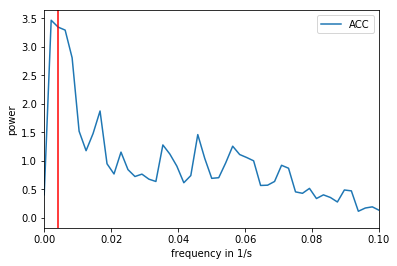

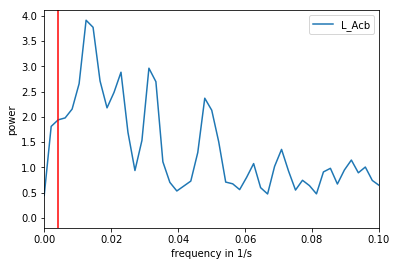

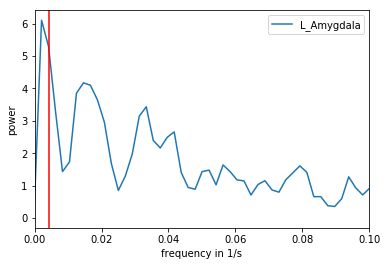

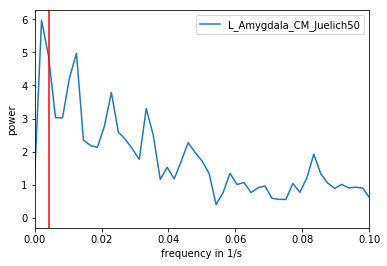

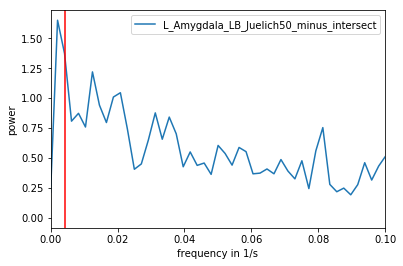

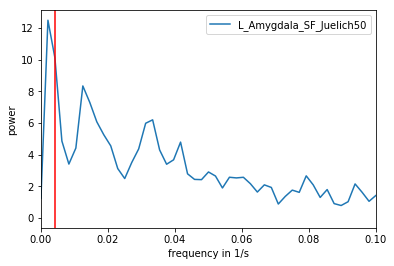

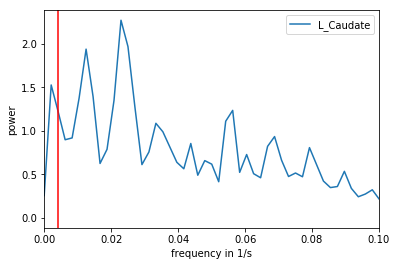

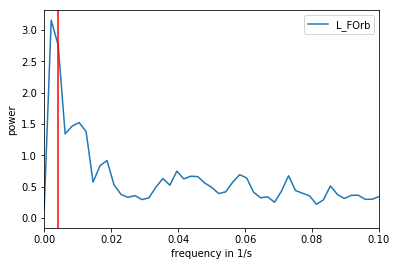

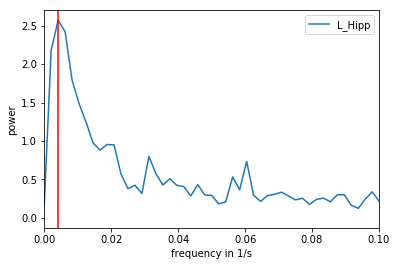

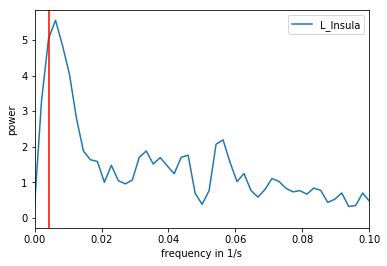

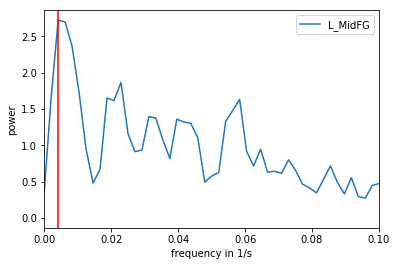

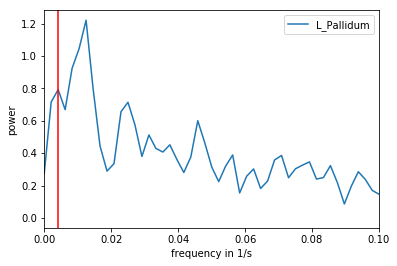

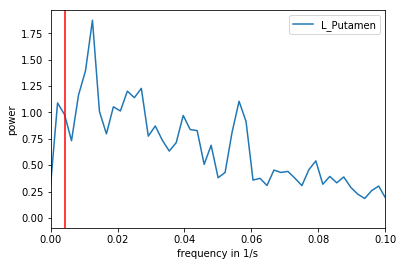

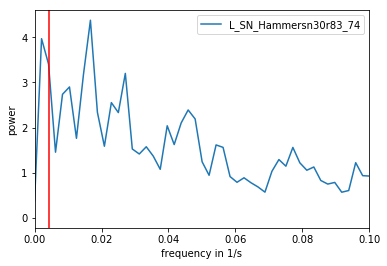

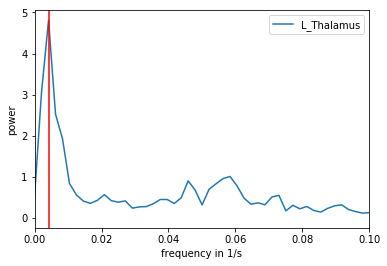

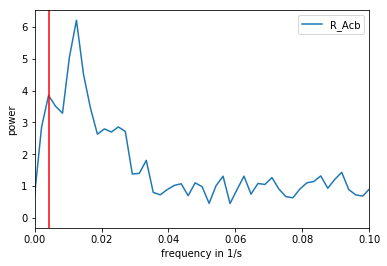

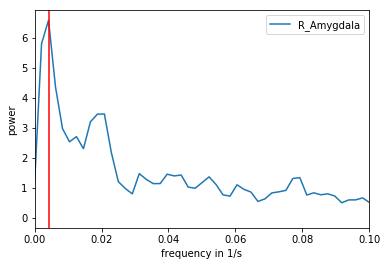

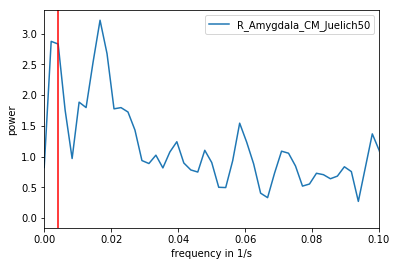

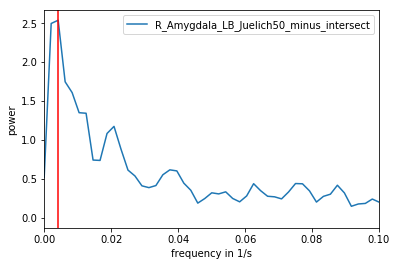

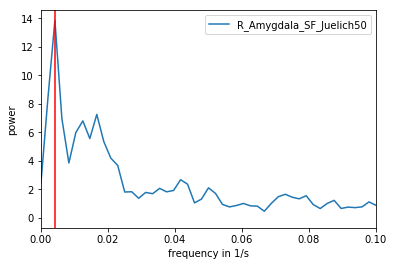

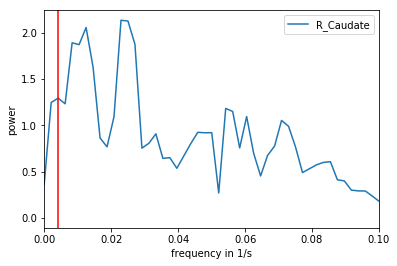

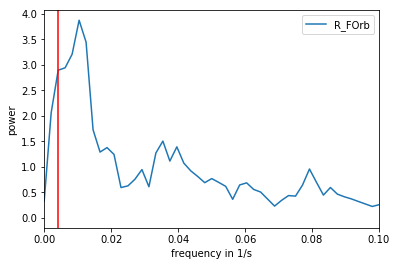

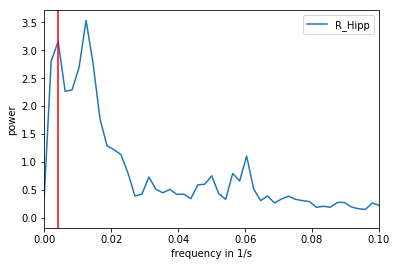

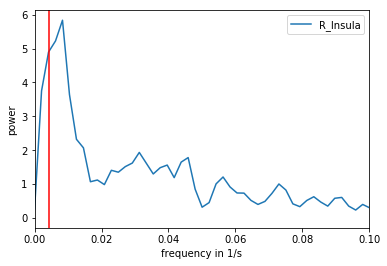

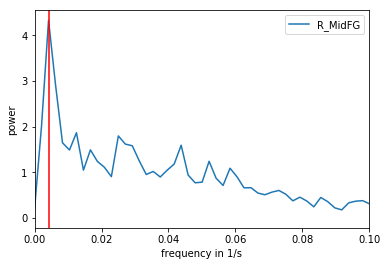

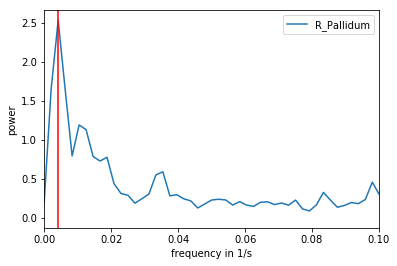

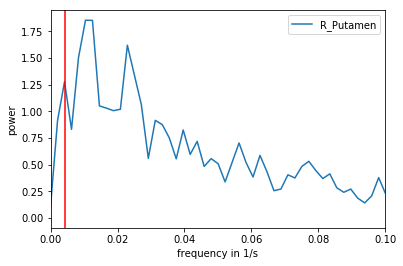

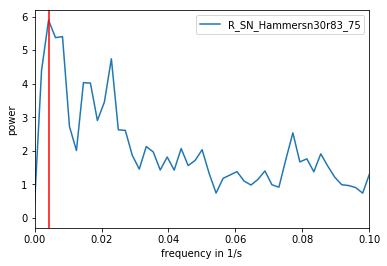

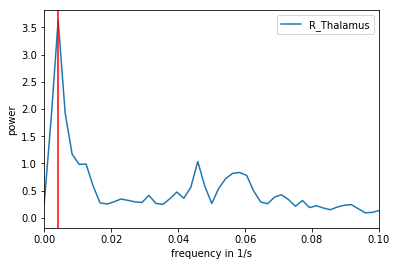

In [23]:
powerspectra = None
for region,roiname in zip(data_puffs_nofilter,roinames):
    f,ps = welch(region,fs=1/0.802,nperseg=598)
    plt.figure()
    plt.plot(f,ps,label=roiname[0])
    plt.xlim((0,0.1))
    plt.xlabel("frequency in 1/s")
    plt.ylabel("power")
    plt.axvline(x=1/240.0,color="r")
    plt.legend()
    if powerspectra is None:
        powerspectra  = ps
    else:
        powerspectra = np.vstack((powerspectra,ps))


In [24]:
print(f)

[ 0.          0.00208509  0.00417018  0.00625526  0.00834035  0.01042544
  0.01251053  0.01459562  0.01668071  0.01876579  0.02085088  0.02293597
  0.02502106  0.02710615  0.02919124  0.03127632  0.03336141  0.0354465
  0.03753159  0.03961668  0.04170177  0.04378685  0.04587194  0.04795703
  0.05004212  0.05212721  0.0542123   0.05629738  0.05838247  0.06046756
  0.06255265  0.06463774  0.06672283  0.06880791  0.070893    0.07297809
  0.07506318  0.07714827  0.07923335  0.08131844  0.08340353  0.08548862
  0.08757371  0.0896588   0.09174388  0.09382897  0.09591406  0.09799915
  0.10008424  0.10216933  0.10425441  0.1063395   0.10842459  0.11050968
  0.11259477  0.11467986  0.11676494  0.11885003  0.12093512  0.12302021
  0.1251053   0.12719039  0.12927547  0.13136056  0.13344565  0.13553074
  0.13761583  0.13970091  0.141786    0.14387109  0.14595618  0.14804127
  0.15012636  0.15221144  0.15429653  0.15638162  0.15846671  0.1605518
  0.16263689  0.16472197  0.16680706  0.16889215  0.1

In [25]:
totalpower=np.mean(powerspectra,axis=1)
print(totalpower.shape)
print(powerspectra.shape)
scaled_PS = np.divide(powerspectra.T,totalpower).T
print(scaled_PS.shape)

sorted_PS =scaled_PS[scaled_PS[:,2].argsort()[::-1]]
sorted_roinames = roinames[scaled_PS[:,2].argsort()[::-1]]
print(sorted_PS.shape)

(29,)
(29, 300)
(29, 300)
(29, 300)


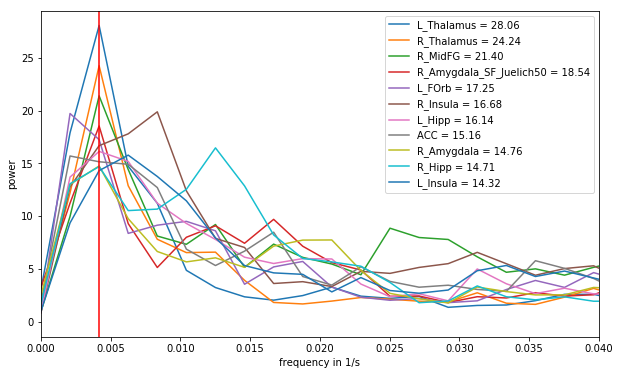

In [26]:
plt.figure(figsize=(10,6))
for spectra,roiname in zip(sorted_PS,sorted_roinames):
    if spectra[2] > 14:
        rel_strength = '{:2.2f}'.format(spectra[2])
        plt.plot(f,spectra,label=roiname[0]+" = "+rel_strength)
        plt.xlim((0,0.04))
    
plt.xlabel("frequency in 1/s")
plt.ylabel("power")
plt.axvline(x=1/240.0,color="r")
plt.legend()



In [27]:
for puff,pufftotal,roiname in zip(powerspectra.T[2],totalpower,roinames):
    print(puff,puff/pufftotal,roiname[0])

3.34358994819 15.1583003004 ACC
1.94047952367 3.42316087116 L_Acb
5.29536389822 8.8099071724 L_Amygdala
4.88922083931 5.89261752093 L_Amygdala_CM_Juelich50
1.37273028796 6.43391143237 L_Amygdala_LB_Juelich50_minus_intersect
10.1071385555 9.29606971053 L_Amygdala_SF_Juelich50
1.21975700099 5.10448583185 L_Caudate
2.76097036616 17.2517608212 L_FOrb
2.57016469831 16.1409277058 L_Hipp
5.03769560733 14.3204860976 L_Insula
2.72388117164 11.8526523599 L_MidFG
0.79216745628 4.12615958995 L_Pallidum
0.979060613021 4.96809737407 L_Putamen
3.40658978371 4.25950406764 L_SN_Hammersn30r83_74
4.80931409954 28.0555010946 L_Thalamus
3.85075715799 5.31070204603 R_Acb
6.58281615559 14.7587790454 R_Amygdala
2.83220894976 4.13626721807 R_Amygdala_CM_Juelich50
2.5378146082 12.2250750748 R_Amygdala_LB_Juelich50_minus_intersect
13.8550894619 18.5432911081 R_Amygdala_SF_Juelich50
1.29437197225 5.41584705476 R_Caudate
2.89224659244 13.2120926868 R_FOrb
3.15772777893 14.7076242446 R_Hipp
4.89809259952 16.6821224

In [28]:
for puff,roiname in zip(sorted_PS.T[2],sorted_roinames):
    print(puff,roiname[0])

28.0555010946 L_Thalamus
24.2446112421 R_Thalamus
21.395272446 R_MidFG
18.5432911081 R_Amygdala_SF_Juelich50
17.2517608212 L_FOrb
16.6821224757 R_Insula
16.1409277058 L_Hipp
15.1583003004 ACC
14.7587790454 R_Amygdala
14.7076242446 R_Hipp
14.3204860976 L_Insula
13.2120926868 R_FOrb
12.8773877581 R_Pallidum
12.2250750748 R_Amygdala_LB_Juelich50_minus_intersect
11.8526523599 L_MidFG
9.29606971053 L_Amygdala_SF_Juelich50
8.8099071724 L_Amygdala
6.76977183291 R_Putamen
6.43391143237 L_Amygdala_LB_Juelich50_minus_intersect
5.89261752093 L_Amygdala_CM_Juelich50
5.71501004062 R_SN_Hammersn30r83_75
5.41584705476 R_Caudate
5.31070204603 R_Acb
5.10448583185 L_Caudate
4.96809737407 L_Putamen
4.25950406764 L_SN_Hammersn30r83_74
4.13626721807 R_Amygdala_CM_Juelich50
4.12615958995 L_Pallidum
3.42316087116 L_Acb
